# ch04.02. 회귀문제 EDA - diamonds
---
* 날짜: 2022.05.10
* 이름: 윤태우

## 학습내용
    - diamonds 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [2]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* seaborn에서 제공하는 `diamonds` 데이터셋을 불러오기

In [3]:
df = sns.load_dataset('diamonds')

* 데이터셋 일부 확인

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* 결측지 비율 확인

In [6]:
# 결측치 없음.

### **| 기술통계**

* `info` 이용해 데이터 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


* 숫자 자료형의 기술 통계

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* 숫자 자료형 외의 기술 통계

In [9]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
df.describe(include='category')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


* 숫자 자료형 외 값 및 개수 확인

In [19]:
nums = list(df.describe().columns)
noms = list(df.describe(include='category').columns)
for col in noms :
  print(col)
  print( (df[col].value_counts) )

cut
<bound method IndexOpsMixin.value_counts of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']>
color
<bound method IndexOpsMixin.value_counts of 0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']>
clarity
<bound method IndexOpsMixin.value_counts of 0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']>


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

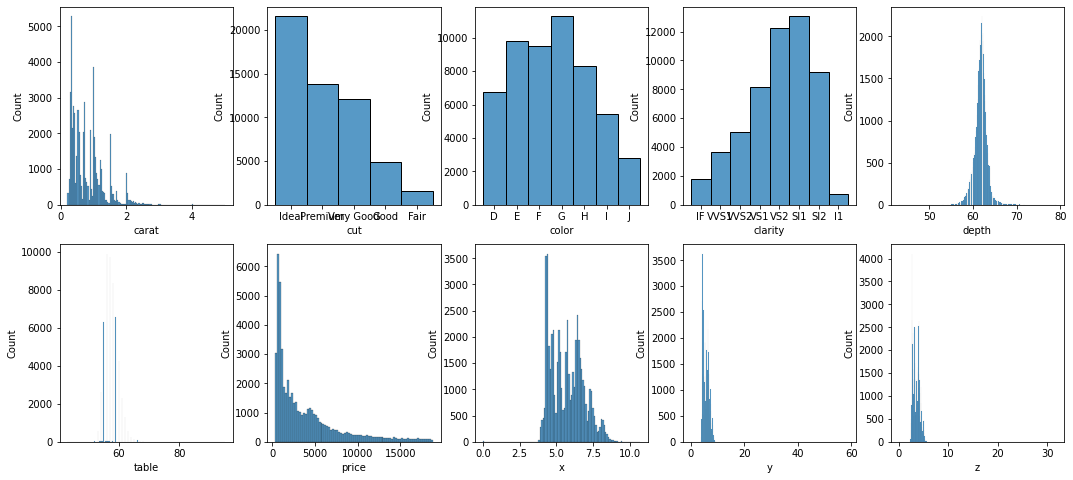

In [13]:
f, axes = plt.subplots(2,5, figsize = (18,8))
axes = axes.flatten()
for col, ax in zip(df.columns, axes) :
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [21]:
nums = list(df.describe().columns)   # 연속형
noms = list(df.describe(include='category').columns)  #범주형(카테고리)
print('연속형 자료', nums)
print('범주 / 이산 자료', noms)
print('예측할 범주', 'diamonds 의 캐럿에 따른 가격 또는 크기')
print('추가 전처리가 필요한 속성 : cut, color, clarity(수치형으로 범주화)')

연속형 자료 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
범주 / 이산 자료 ['cut', 'color', 'clarity']
예측할 범주 diamonds 의 캐럿에 따른 가격 또는 크기
추가 전처리가 필요한 속성 : cut, color, clarity(수치형으로 범주화)


* 데이터 정리하기
  * 데이터 소개 : 보석의 특성들
  * 자료형 소개 : 보석의 캐럿, 가격, 가로,세로 길이, 깊이 등 

  * 모델링을 위한 자료형 구분:
  연속형 자료 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
  범주 / 이산 자료 ['cut', 'color', 'clarity']


## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

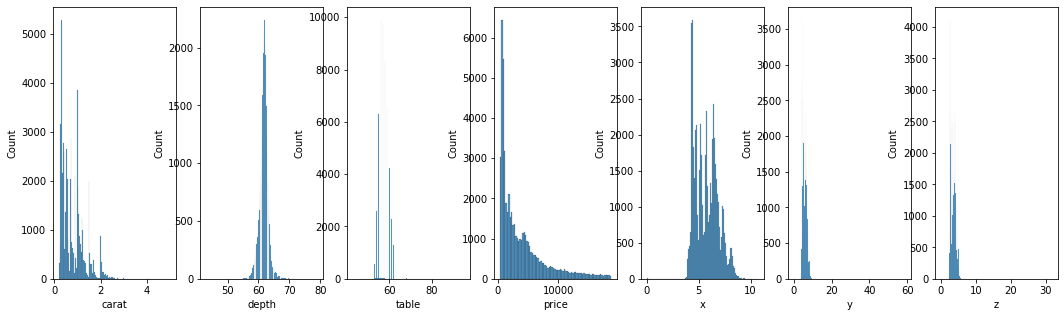

In [26]:
f, axes = plt.subplots(1,len(nums), figsize = (18,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.histplot(data = df, x = col, ax = ax)

* 이산 자료형 분포 그리기

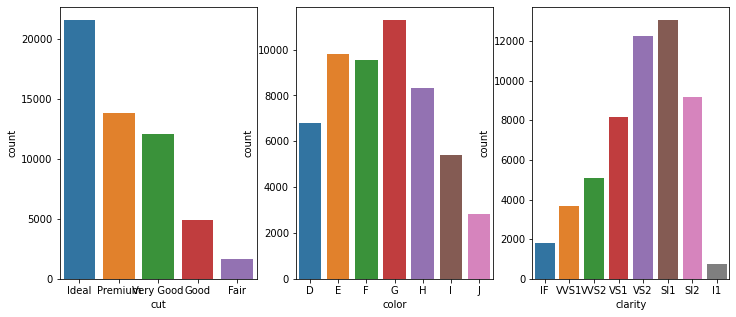

In [36]:
f, axes = plt.subplots(1, len(noms), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(noms, axes) :
  sns.countplot(data = df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [35]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

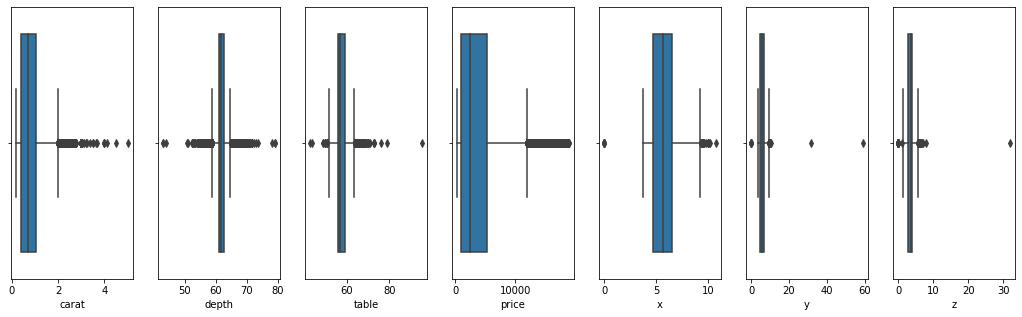

In [38]:
f, axes = plt.subplots(1, len(nums), figsize = (18,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.boxplot(data = df, x=col, ax=ax)
plt.show()

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

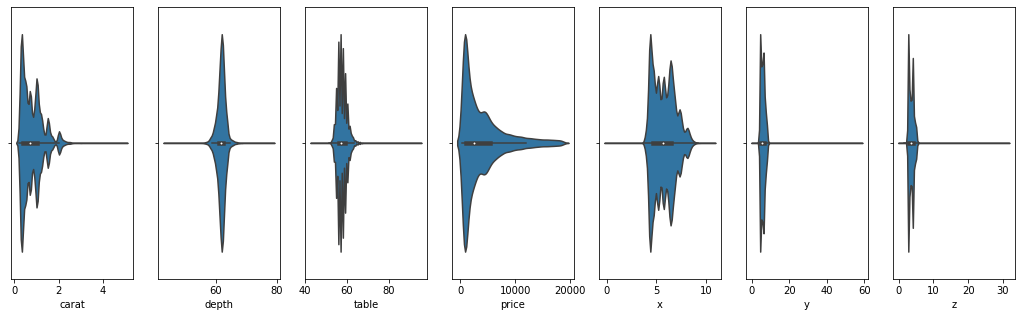

In [40]:
f, axes = plt.subplots(1, len(nums), figsize = (18,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.violinplot(data = df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [42]:
df.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

* `kurt` 이용해 첨도 구하기

In [43]:
df.kurt()

carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `displot`으로 그리기


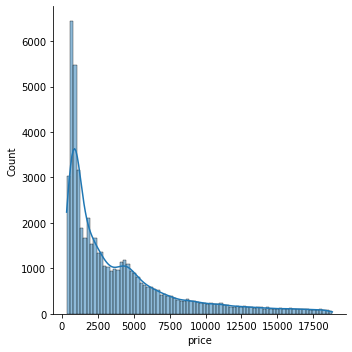

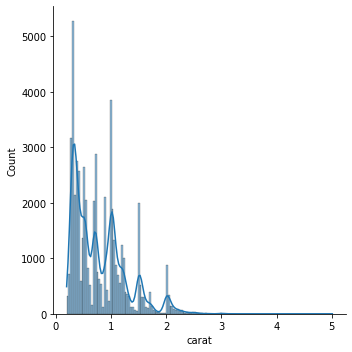

In [52]:
sns.displot(data = df, x='price', kde = True)
sns.displot(data = df, x='carat', kde = True)
plt.show()

* `boxplot`으로 기술통계 시각화 하기

In [54]:
def minmax(X) :
  return (X-min(X))/(max(X)-min(X))

df1 = df[nums]

# nums minmax 스케일링

for num in nums :
  df1[num] = minmax(df1[num])
df1.head()

,carat,depth,table,price,x,y,z
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


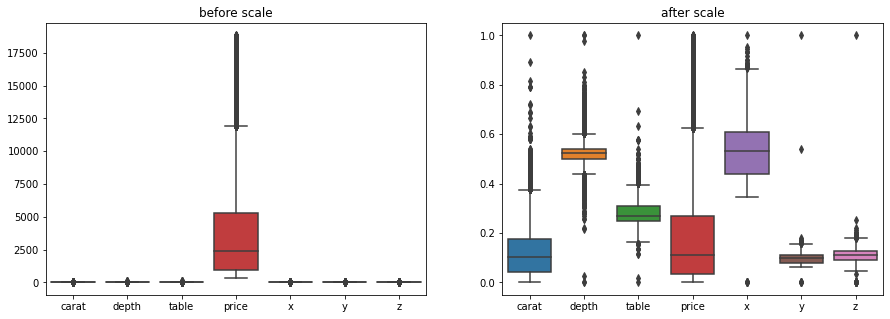

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df[nums])
plt.title('before scale')

plt.subplot(1,2,2)
sns.boxplot(data = df1)
plt.title('after scale')
plt.show()

* `violinplot`으로 기술통계 시각화 하기

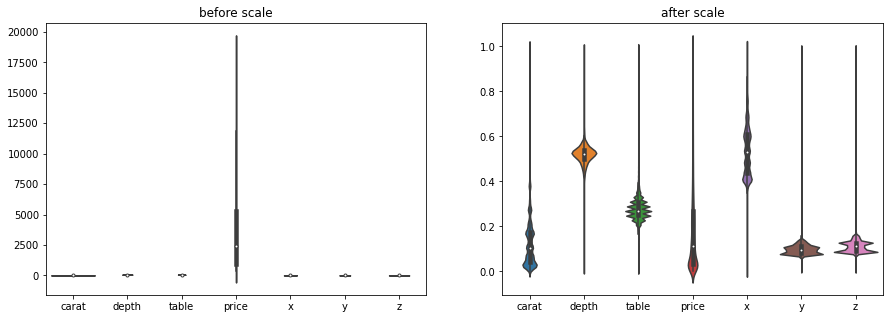

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(data = df[nums])
plt.title('before scale')

plt.subplot(1,2,2)
sns.violinplot(data = df1)
plt.title('after scale')
plt.show()

* `describe` 로 `price`의 기술통계 값 구하기

In [57]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

* `price` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [58]:
df.price.agg(['skew', 'kurt', 'min', 'max', 'mean'])


skew        1.618395
kurt        2.177696
min       326.000000
max     18823.000000
mean     3932.799722
Name: price, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [61]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [65]:
df.corr().style.background_gradient(cmap = 'Reds')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

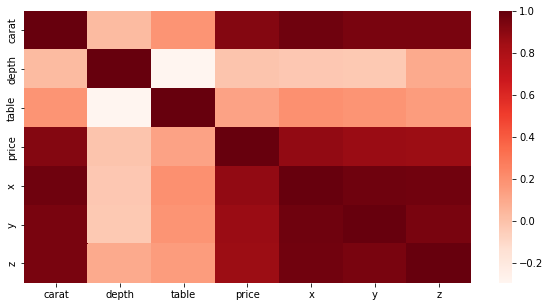

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap = 'Reds')

* 예측값과 관련있는 속성 순서대로 정리하기

In [67]:
# 가격(price)와 캐럿(carat), x,y,z 축 값들이 관계가 깊다.
# -> 보석의 가로,세로, 높이와 캐럿이 커짐에 따라 가격이 높아진다.

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

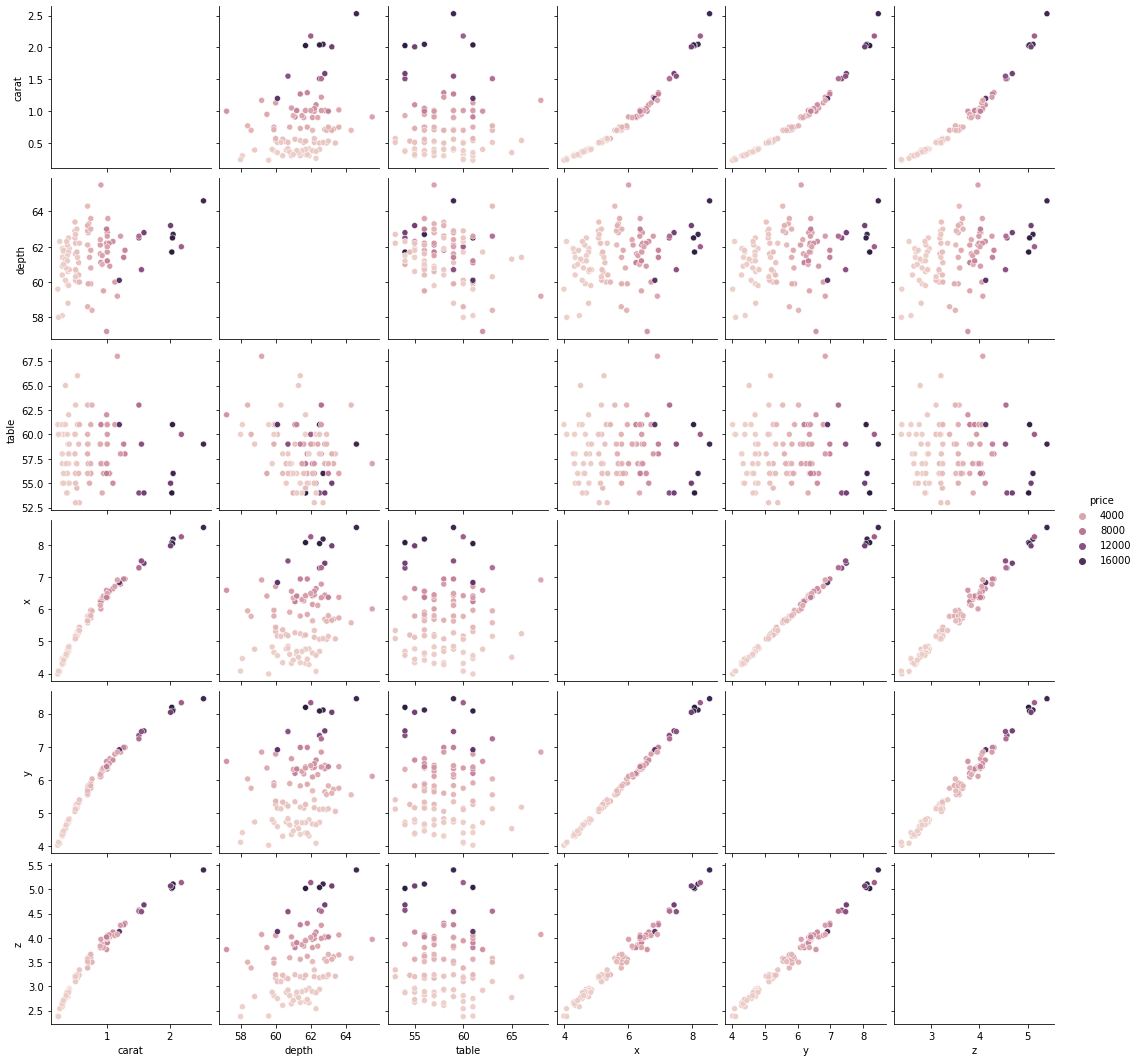

In [68]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
sns.pairplot(df.sample(100), hue = 'price')

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

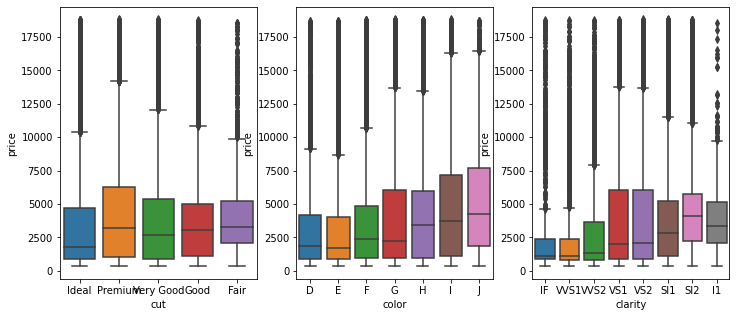

In [69]:
f, axes = plt.subplots(1, len(noms), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(noms, axes) :
  sns.boxplot(data = df, x=col, y = 'price', ax= ax)
plt.show()

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

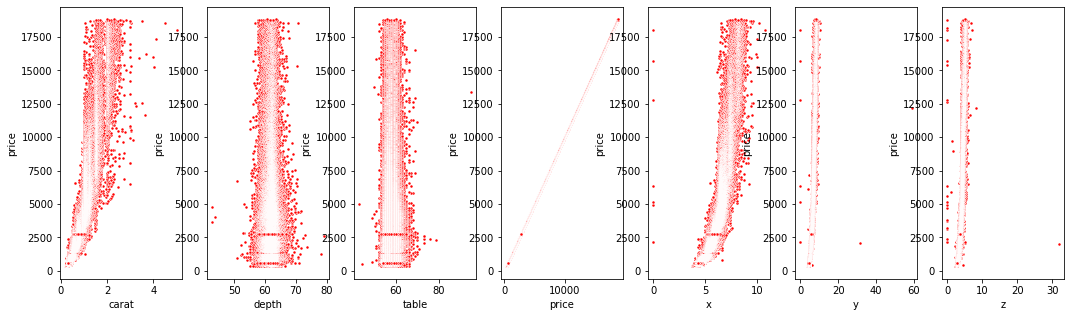

In [73]:
f, axes = plt.subplots(1, len(nums), figsize = (18,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.scatterplot(data = df, x=col, y = 'price', ax= ax, marker = '.', color = 'r')
plt.show()

* `hue` 옵션에 `color` 추가해서 그리기 

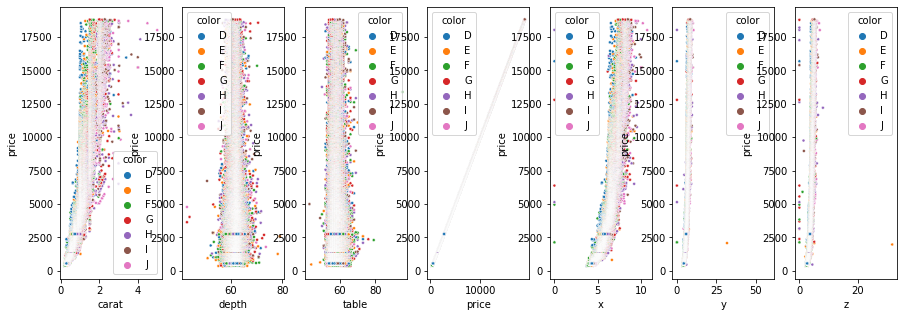

In [76]:

f, axes = plt.subplots(1, len(nums), figsize = (15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.scatterplot(data = df, x=col, y = 'price', ax= ax, marker = '.', hue = 'color')
plt.show()

* `regplot`으로 회귀 시각화

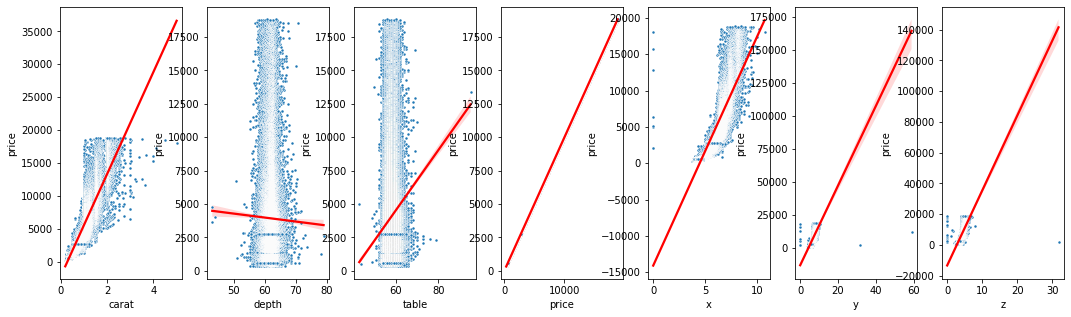

In [79]:
f, axes = plt.subplots(1, len(nums), figsize = (18,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.regplot(data = df, x=col, y = 'price', ax= ax, marker = '', color = 'r')
  sns.scatterplot(data = df, x= col, y = 'price', ax= ax, marker = '.')
plt.show()

* `residplot`으로 잔차 시각화

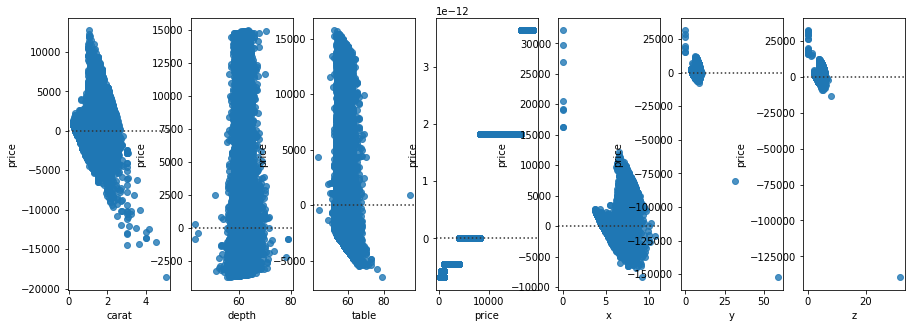

In [83]:
f, axes = plt.subplots(1, len(nums), figsize = (15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.residplot(data = df, x=col, y = 'price', ax= ax)
plt.show()


* `lmplot`으로 `color`별 회귀 시각화

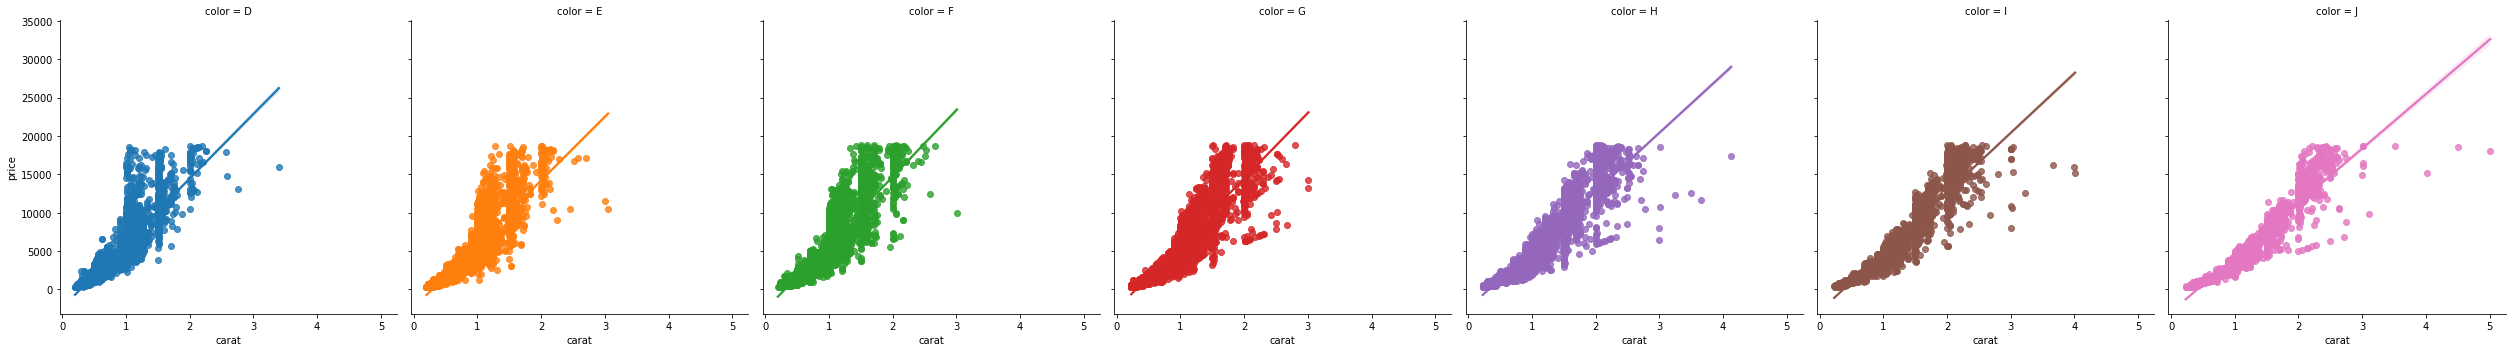

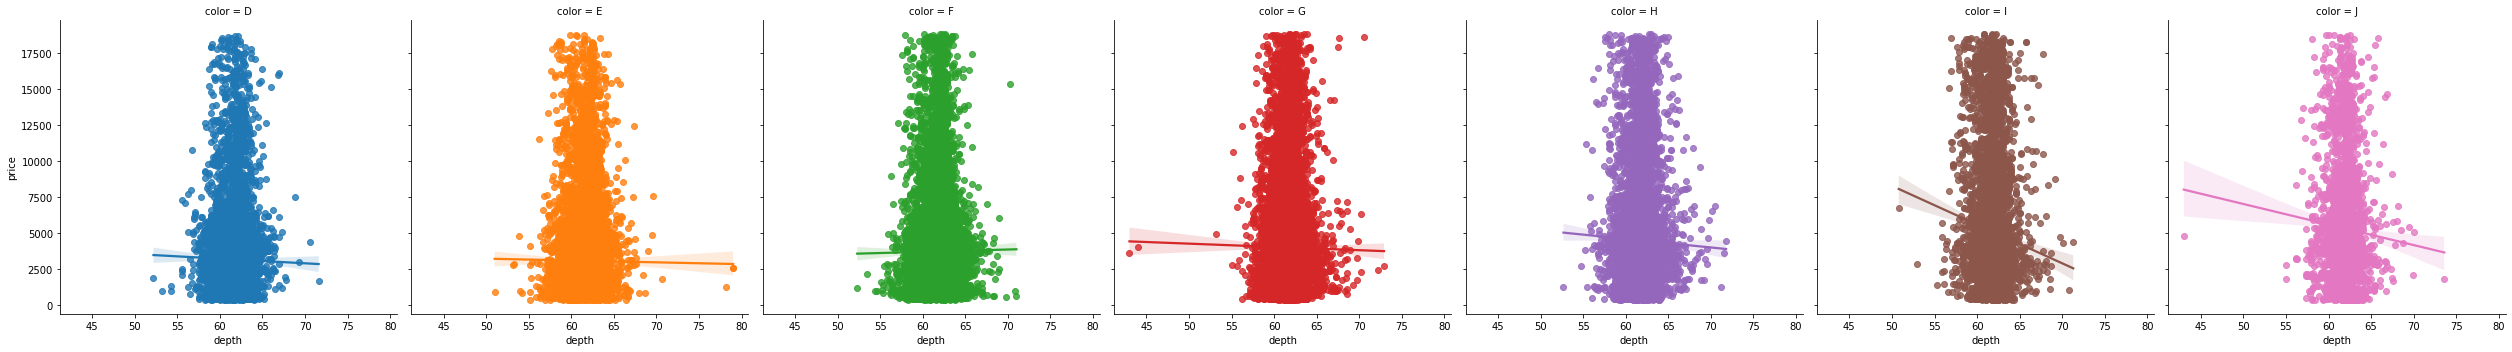

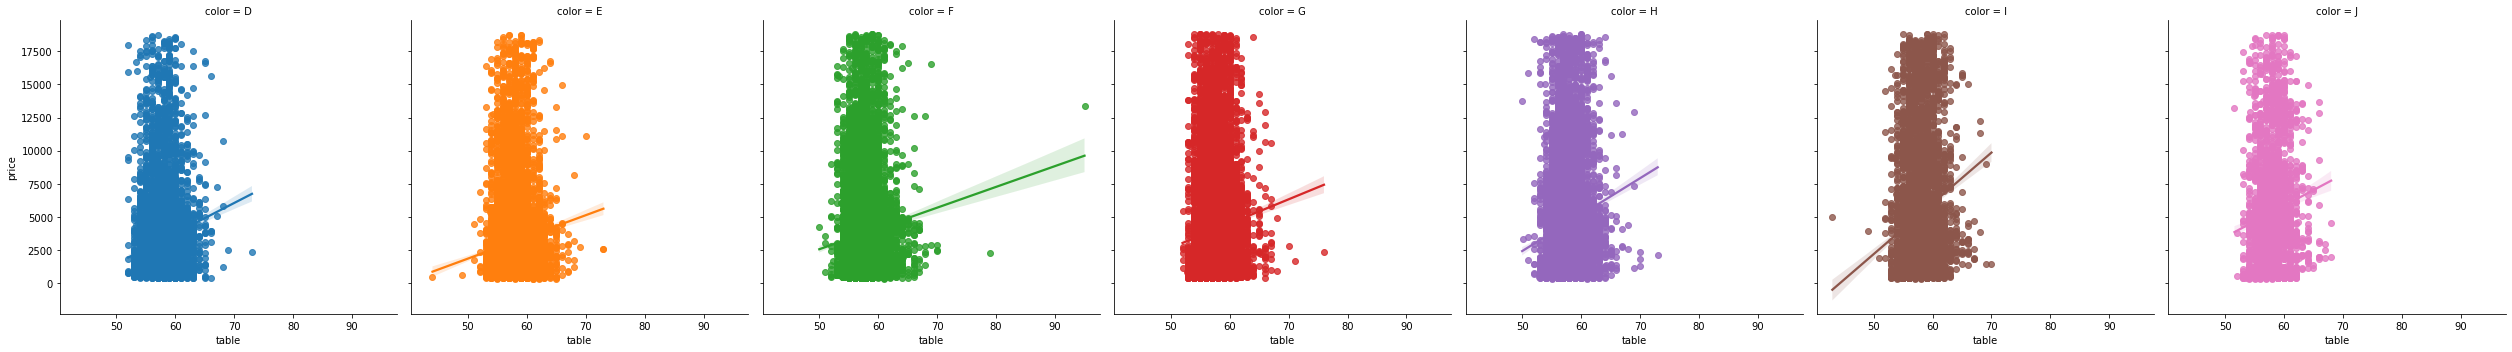

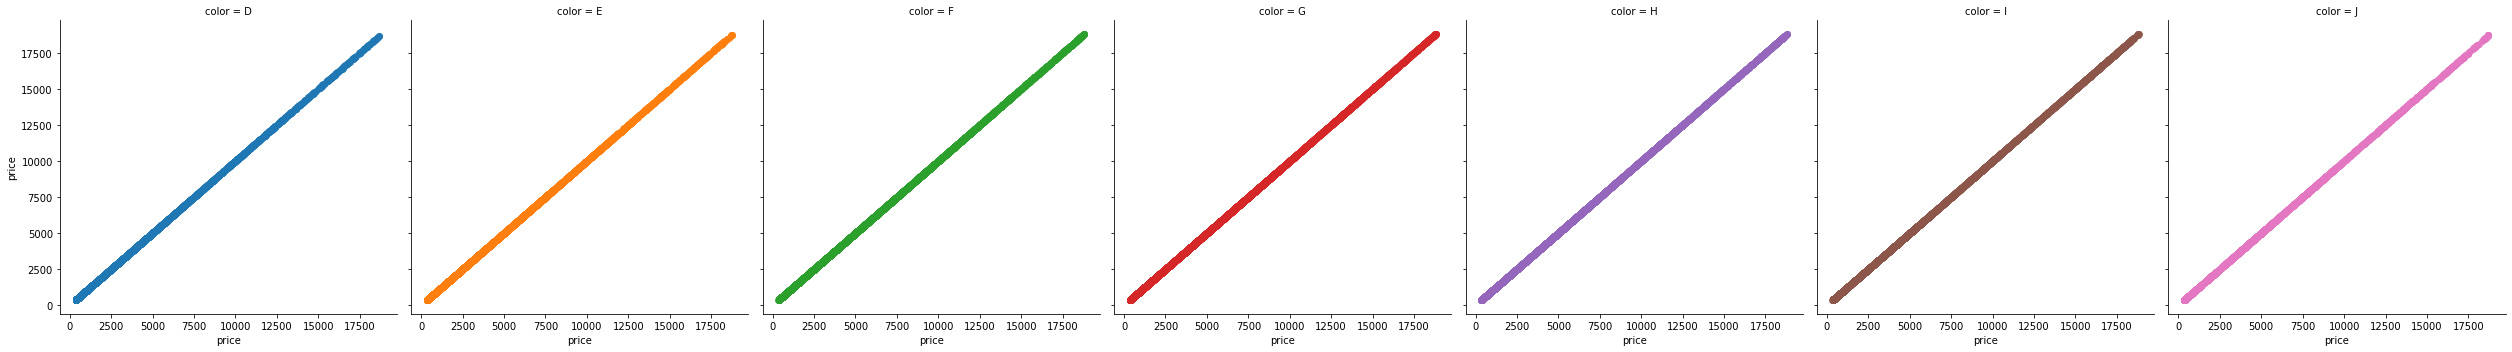

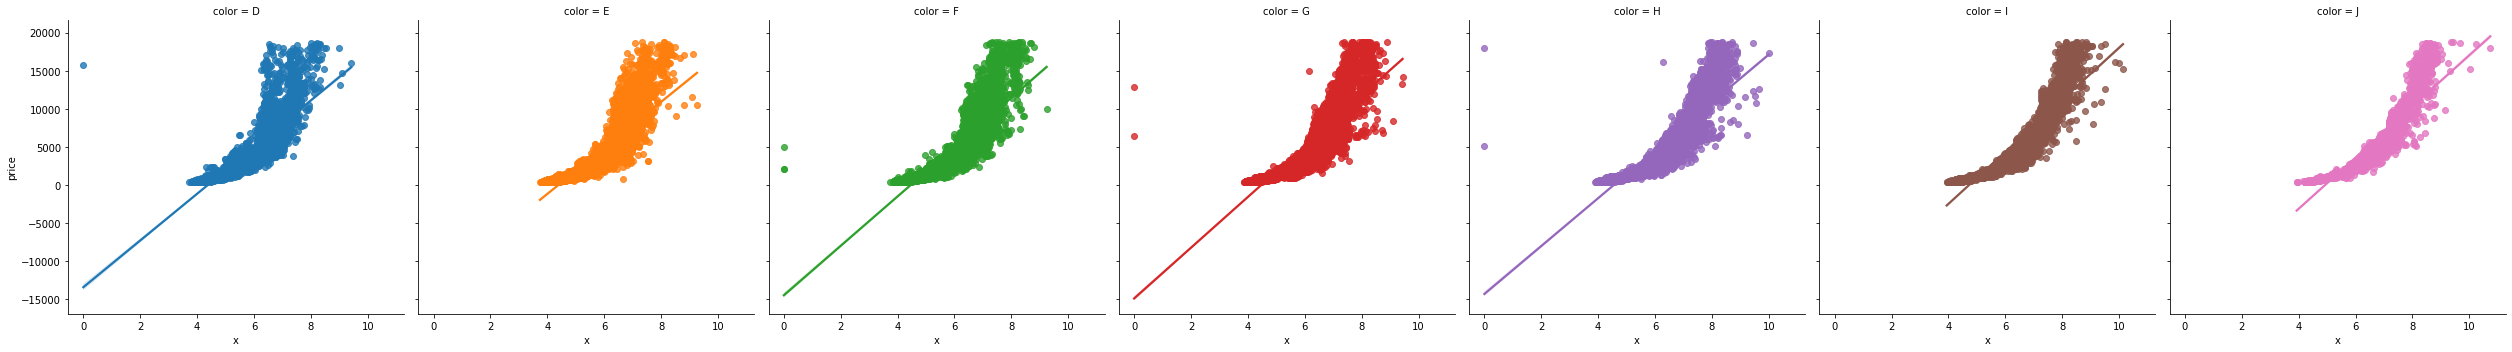

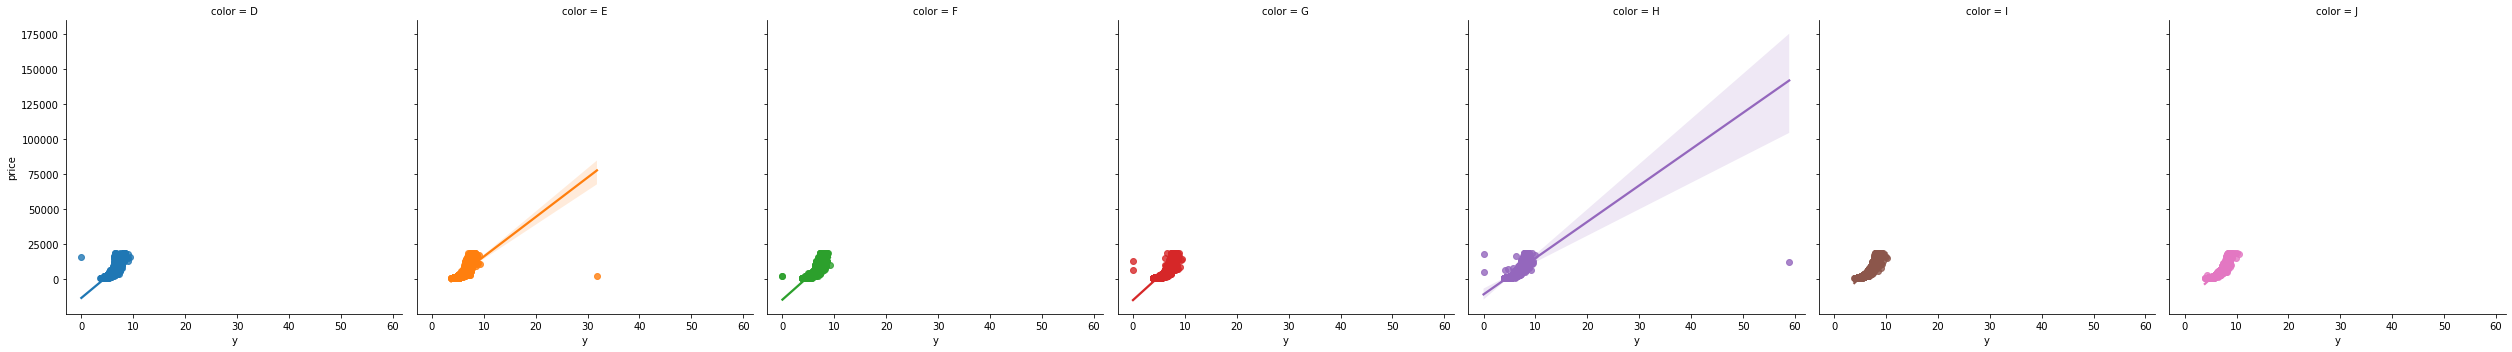

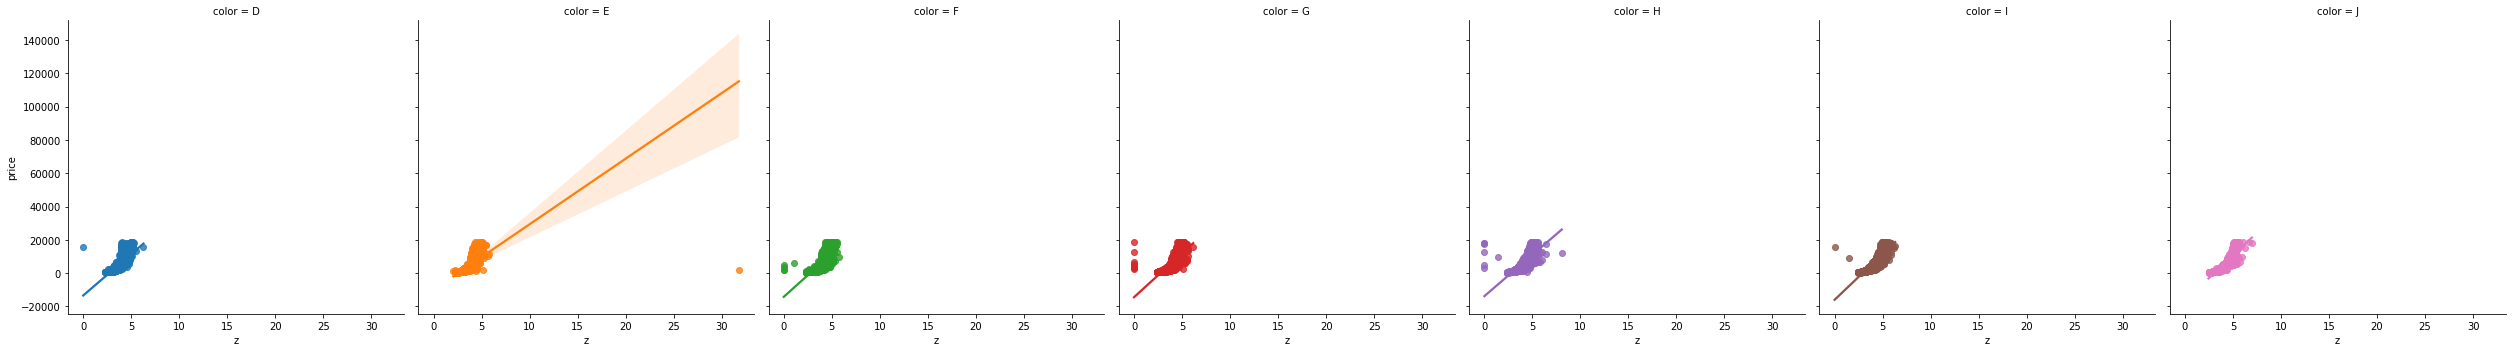

In [85]:
for col in nums :
  sns.lmplot(data = df, x=col, y = 'price', hue = 'color', col = 'color')
plt.show()

In [86]:
def minmax(X) :
  return (X-min(X))/(max(X)-min(X))

for num in nums :
  df[num] = minmax(df[num])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [87]:
# color 와 clarity의 값들을 숫자로 범주화

for i,j in zip(df['color'].unique(), range(len(df['color']))) :
  df['color'] = df['color'].replace({i:j})
df.head()

for i,j in zip(df['clarity'].unique(), range(len(df['clarity']))) :
  df['clarity'] = df['clarity'].replace({i:j})
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,0,0,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,0,1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,0,2,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,1,3,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,2,0,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [89]:
# cut one-hot 인코딩
one_hot = pd.get_dummies(df['cut'])
a = np.array(one_hot)
df['cut'] = a
df.rename(columns = {'cut' : 'grade'}, inplace = True)     # 컬럼 cut을 직관적으로 알 수 있게 grade(등급) 으로 변경
df.head()

,carat,grade,color,clarity,depth,table,price,x,y,z
0,0.006237,1,0,0,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0,0,1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0,0,2,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0,1,3,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0,2,0,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
